In [1]:
from rnaFetch.mirTFetch import mirTFetch
from rnaFetch.FetchBioMart import GeneBiomart
from rnaFetch.mirCDSFetch import microTCDS
import pandas as pd 
from pySankey.sankey import sankey

In [3]:
# run the data 
dictionary = {"GlyCCC": ["GCATTGGTGGTTCAGTGGTAGAATTCTC", 
                         "GCATTGGTGGTTCAGTGGTAGAATTCTCGCC", 
                         "GCATTGGTGGTTCAGTGGTAGAATTCT"],
             "LysTTT": ["GGGAGCGCCCGGATAGCTCAGTCGGTAGAGCATCAGACTTTT",
                        "TCGGGCGGGAGTGGTGGCTTTT",
                        "TCGGGCGGGAGTGGTGGCTTT"],
              "ThrAGT": ["TCGAATCCCAGCGGTGCCTCCA",
                         "ATCCCAGCGGTGCCTCCA",
                         "ATCCCAGCGGTGCCTCCG"]}

In [7]:
final_table
new_table
overlap

,Transcript Id,Gene Id(name),Mirna Name,miTG score,Gene_ID,Gene Symbol,Sequence,Transcript_ID,Score,utrs,Query,external_gene_name
0,ENST00000338965,ENSG00000188211 (NCR3LG1),hsa-miR-7106-5p,1.000000,ENSG00000188211,NCR3LG1,>ATCCCAGCGGTGCCTCCA,ENST00000338965,0.992397,8,ThrAGT,NCR3LG1
1,ENST00000338965,ENSG00000188211 (NCR3LG1),hsa-miR-7106-5p,1.000000,ENSG00000188211,NCR3LG1,>ATCCCAGCGGTGCCTCCG,ENST00000338965,0.992377,8,ThrAGT,NCR3LG1
2,ENST00000594385,ENSG00000197013 (ZNF429),hsa-miR-449c-5p,1.000000,ENSG00000197013,ZNF429,>ATCCCAGCGGTGCCTCCA,ENST00000594385,0.997473,3,ThrAGT,ZNF429
3,ENST00000594385,ENSG00000197013 (ZNF429),hsa-miR-449c-5p,1.000000,ENSG00000197013,ZNF429,>ATCCCAGCGGTGCCTCCG,ENST00000594385,0.997628,3,ThrAGT,ZNF429
4,ENST00000594385,ENSG00000197013 (ZNF429),hsa-miR-34b-5p,1.000000,ENSG00000197013,ZNF429,>ATCCCAGCGGTGCCTCCA,ENST00000594385,0.997473,3,ThrAGT,ZNF429
...,...,...,...,...,...,...,...,...,...,...,...,...
20432,ENST00000233190,ENSG00000023228 (NDUFS1),hsa-miR-4801,0.900209,ENSG00000023228,NDUFS1,>ATCCCAGCGGTGCCTCCG,ENST00000233190,0.950868,15,ThrAGT,NDUFS1
20433,ENST00000300413,ENSG00000167088 (SNRPD1),hsa-miR-142-5p,0.900177,ENSG00000167088,SNRPD1,>ATCCCAGCGGTGCCTCCG,ENST00000300413,0.952071,8,ThrAGT,SNRPD1
20434,ENST00000420826,ENSG00000188612 (SUMO2),hsa-miR-4282,0.900103,ENSG00000188612,SUMO2,>ATCCCAGCGGTGCCTCCG,ENST00000420826,0.951194,4,ThrAGT,SUMO2
20435,ENST00000296257,ENSG00000163904 (SENP2),hsa-miR-3942-3p,0.900091,ENSG00000163904,SENP2,>ATCCCAGCGGTGCCTCCA,ENST00000296257,0.950733,7,ThrAGT,SENP2


Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
234 234 234
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Setted threshold successfully to 0.9
Download of the Table initialized
Download Done and added to the Slot data_per_threshold
Job is running
All Data is queried successfully, Job completed
Setted threshold successfully to 0.9
Download of the Table initialized
Download Done and added to the Slot data_per_threshold


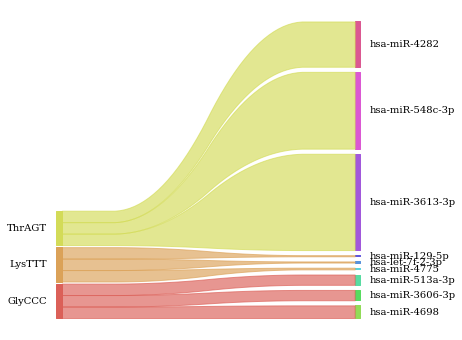

In [4]:
# load the module
fetcht = mirTFetch("Chrome")
fetcht.threshold = 0.95
fetcht.run_miRNA_analysis(dictionary)
biomart_data = GeneBiomart(fetcht.prediction_data["Transcript_ID"].unique().tolist())
return_table = biomart_data.query_data()
final_table = biomart_data.merge_annotation(fetcht.prediction_data, return_table)
fetchcds = microTCDS(final_table, threshold = 0.95)
new_table = fetchcds.run_miRNA_analysis()
overlap, grouped = fetchcds.get_mt_cds_overlap(final_table, new_table)
fetchcds.plot_sankey_mirna_overlap(grouped)

In [4]:
grouped

,Query,Mirna Name,count
0,GlyCCC,hsa-miR-4698,1.10
1,GlyCCC,hsa-miR-3606-3p,0.90
2,GlyCCC,hsa-miR-513a-3p,0.90
3,LysTTT,hsa-miR-4775,0.15
4,LysTTT,hsa-let-7f-2-3p,0.10
5,LysTTT,hsa-miR-129-5p,0.10
6,ThrAGT,hsa-miR-3613-3p,8.40
7,ThrAGT,hsa-miR-548c-3p,6.70
8,ThrAGT,hsa-miR-4282,3.95
